# Part 2: Use an API to extract box office revenue and profit data to add to your IMDB data and perform exploratory data analysis.

In [1]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Additional Imports
import os, json, math, time
from yelpapi import YelpAPI
from tqdm.notebook import tqdm_notebook

In [2]:
# Install tmdbsimple (only need to run once)
!pip install tmdbsimple


In [3]:
# Load API Credentials
# Load API Credentials
with open('/Users/lbodden/.secret/tmdb_api.json') as f:   #use your path here!
    login = json.load(f)
# Instantiate YelpAPI Variable
yelp_api = YelpAPI(login['api-key'], timeout_s=5.0)

In [4]:
import tmdbsimple as tmdb
tmdb.API_KEY =  login['api-key']

In [5]:
movie = tmdb.Movies('tt0848228')

In [6]:
info = movie.info()
info

{'adult': False,
 'backdrop_path': '/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg',
 'belongs_to_collection': {'id': 86311,
  'name': 'The Avengers Collection',
  'poster_path': '/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg',
  'backdrop_path': '/zuW6fOiusv4X9nnW3paHGfXcSll.jpg'},
 'budget': 220000000,
 'genres': [{'id': 878, 'name': 'Science Fiction'},
  {'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'}],
 'homepage': 'https://www.marvel.com/movies/the-avengers',
 'id': 24428,
 'imdb_id': 'tt0848228',
 'original_language': 'en',
 'original_title': 'The Avengers',
 'overview': 'When an unexpected enemy emerges and threatens global safety and security, Nick Fury, director of the international peacekeeping agency known as S.H.I.E.L.D., finds himself in need of a team to pull the world back from the brink of disaster. Spanning the globe, a daring recruitment effort begins!',
 'popularity': 184.117,
 'poster_path': '/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg',
 'production_companies': [{'id': 420,
   'logo_path

In [7]:
info['budget']

220000000

In [8]:
info['revenue']

1518815515

In [9]:
info['imdb_id']

'tt0848228'

In [10]:
# Function to get the certification.
def get_movie_with_rating(movie_id):
    movie = tmdb.Movies(movie_id)
    info = movie.info()
    releases = movie.releases()
    
    for c in releases['countries']:
        if c['iso_3166_1'] == "US":
            info['certifcation'] = c['certification']     
    return info

In [11]:
test = get_movie_with_rating("tt0848228") 
test


{'adult': False,
 'backdrop_path': '/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg',
 'belongs_to_collection': {'id': 86311,
  'name': 'The Avengers Collection',
  'poster_path': '/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg',
  'backdrop_path': '/zuW6fOiusv4X9nnW3paHGfXcSll.jpg'},
 'budget': 220000000,
 'genres': [{'id': 878, 'name': 'Science Fiction'},
  {'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'}],
 'homepage': 'https://www.marvel.com/movies/the-avengers',
 'id': 24428,
 'imdb_id': 'tt0848228',
 'original_language': 'en',
 'original_title': 'The Avengers',
 'overview': 'When an unexpected enemy emerges and threatens global safety and security, Nick Fury, director of the international peacekeeping agency known as S.H.I.E.L.D., finds himself in need of a team to pull the world back from the brink of disaster. Spanning the globe, a daring recruitment effort begins!',
 'popularity': 184.117,
 'poster_path': '/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg',
 'production_companies': [{'id': 420,
   'logo_path

In [12]:
movie = tmdb.Movies('tt0332280')

In [13]:
info = movie.info()
info

{'adult': False,
 'backdrop_path': '/qom1SZSENdmHFNZBXbtJAU0WTlC.jpg',
 'belongs_to_collection': None,
 'budget': 29000000,
 'genres': [{'id': 10749, 'name': 'Romance'}, {'id': 18, 'name': 'Drama'}],
 'homepage': 'http://www.newline.com/properties/notebookthe.html',
 'id': 11036,
 'imdb_id': 'tt0332280',
 'original_language': 'en',
 'original_title': 'The Notebook',
 'overview': "An epic love story centered around an older man who reads aloud to a woman with Alzheimer's. From a faded notebook, the old man's words bring to life the story about a couple who is separated by World War II, and is then passionately reunited, seven years later, after they have taken different paths.",
 'popularity': 59.094,
 'poster_path': '/rNzQyW4f8B8cQeg7Dgj3n6eT5k9.jpg',
 'production_companies': [{'id': 12,
   'logo_path': '/iaYpEp3LQmb8AfAtmTvpqd4149c.png',
   'name': 'New Line Cinema',
   'origin_country': 'US'},
  {'id': 1565, 'logo_path': None, 'name': 'Avery Pix', 'origin_country': 'US'},
  {'id': 26

In [14]:
info['budget']

29000000

In [15]:
info['revenue']

115603229

In [16]:
info['imdb_id']

'tt0332280'

In [17]:
# Function to get the certification.
def get_movie_with_rating(movie_id):
    movie = tmdb.Movies(movie_id)
    info = movie.info()
    releases = movie.releases()
    
    for c in releases['countries']:
        if c['iso_3166_1'] == "US":
            info['certifcation'] = c['certification']     
    return info

In [18]:
test = get_movie_with_rating("tt0332280") 
test


{'adult': False,
 'backdrop_path': '/qom1SZSENdmHFNZBXbtJAU0WTlC.jpg',
 'belongs_to_collection': None,
 'budget': 29000000,
 'genres': [{'id': 10749, 'name': 'Romance'}, {'id': 18, 'name': 'Drama'}],
 'homepage': 'http://www.newline.com/properties/notebookthe.html',
 'id': 11036,
 'imdb_id': 'tt0332280',
 'original_language': 'en',
 'original_title': 'The Notebook',
 'overview': "An epic love story centered around an older man who reads aloud to a woman with Alzheimer's. From a faded notebook, the old man's words bring to life the story about a couple who is separated by World War II, and is then passionately reunited, seven years later, after they have taken different paths.",
 'popularity': 59.094,
 'poster_path': '/rNzQyW4f8B8cQeg7Dgj3n6eT5k9.jpg',
 'production_companies': [{'id': 12,
   'logo_path': '/iaYpEp3LQmb8AfAtmTvpqd4149c.png',
   'name': 'New Line Cinema',
   'origin_country': 'US'},
  {'id': 1565, 'logo_path': None, 'name': 'Avery Pix', 'origin_country': 'US'},
  {'id': 26

In [45]:
# Summary between both movies.
test_ids = ['tt0848228', 'tt0332280']
results = []

for movie_id in test_ids:  
    try:
        movie_info = get_movie_with_rating(movie_id)
        results.append(movie_info)        
    except: 
        pass
    
pd.DataFrame(results)


,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certifcation
0,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428,tt0848228,en,The Avengers,...,1518815515,143,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,False,7.706,27578,PG-13
1,False,/qom1SZSENdmHFNZBXbtJAU0WTlC.jpg,None,29000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",http://www.newline.com/properties/notebookthe....,11036,tt0332280,en,The Notebook,...,115603229,123,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Behind every great love is a great story.,The Notebook,False,7.879,9845,PG-13


In [20]:
def write_json(new_data, filename):    
    with open(filename,'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        ## Choose extend or append
        if (type(new_data) == list) & (type(file_data) == list):
            file_data.extend(new_data)
        else:
             file_data.append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file)

In [21]:
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['tmbd_data.csv.gz',
 'genres.csv.gz',
 'tmdb_api_results_2000.json',
 'final_tmdb_data_2000.csv.gz',
 'tmdb_api_results_2001.json',
 'title_basics.csv.gz',
 'title_genres.csv.gz',
 'title_aka.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'tmdb_results_combined.csv.gz',
 'title_ratings.csv.gz']

In [22]:
basics_df = pd.read_csv('Data/title_basics.csv.gz', low_memory = False)

In [23]:
basics_df['startYear'] = basics_df['startYear'].astype(int)
basics_df

,tconst,primaryTitle,startYear,runtimeMinutes
0,tt0035423,Kate & Leopold,2001,118
1,tt0062336,The Tango of the Widower and Its Distorting Mi...,2020,70
2,tt0069049,The Other Side of the Wind,2018,122
3,tt0088751,The Naked Monster,2005,100
4,tt0096056,Crime and Punishment,2002,126
...,...,...,...,...
79700,tt9914942,Life Without Sara Amat,2019,74
79701,tt9915872,The Last White Witch,2019,97
79702,tt9916170,The Rehearsal,2019,51
79703,tt9916190,Safeguard,2020,95


In [24]:
# Let's confirm we don't have missing data.
basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79705 entries, 0 to 79704
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tconst          79705 non-null  object
 1   primaryTitle    79705 non-null  object
 2   startYear       79705 non-null  int64 
 3   runtimeMinutes  79705 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.4+ MB


In [25]:
YEARS_TO_GET = [2000, 2001]
errors = [ ]

In [26]:
# Start of OUTER loop
for YEAR in tqdm_notebook(YEARS_TO_GET, desc='YEARS', position=0):
    # Defining the JSON file to store results for year.
    JSON_FILE = f'{FOLDER}tmdb_api_results_{YEAR}.json'
    # Check if the file exists.
    file_exists = os.path.isfile(JSON_FILE)
    # If it does exist: notify me.
    if file_exists == True:
        print(f'{YEAR} {JSON_FILE} already exists.')
    # If it does not exist: create it.
    else:
    # Save an empty dict with just "imdb_id" to the new json file.
        with open(JSON_FILE,'w') as file:
            json.dump([{'imdb_id':0}], file)

    # Saving new year as the current df.        
    df = basics_df.loc[basics_df['startYear'] == YEAR].copy()
    # Saving movie ids to list.
    movie_ids = df['tconst'].copy()
    
    # Load existing data from json into a dataframe called "previous_df"
    previous_df = pd.read_json(JSON_FILE)
    
    # Filter out any ids that are already in the JSON_FILE.
    movie_ids_to_get = movie_ids[~movie_ids.isin(previous_df['imdb_id'])]

    
    # Start of INNER Loop.
    
    for movie_id in tqdm_notebook(movie_ids_to_get,
                                      desc=f'Movies from {YEAR}',
                                      position=1,
                                      leave=True):
            try:
                # Retrieve then data for the movie id.
                temp = get_movie_certification(movie_id)  
                # Append/extend results to existing file using a pre-made function.
                write_json(temp,JSON_FILE)
                # Short 20 ms sleep to prevent overwhelming server.
                time.sleep(0.02)

            except Exception as e:
                errors.append([movie_id, e])

    final_year_df = pd.read_json(JSON_FILE)
    final_year_df.to_csv(f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz", compression="gzip", index=False)

print(f"- Total errors: {len(errors)}")

YEARS:   0%|          | 0/2 [00:00<?, ?it/s]

2000 Data/tmdb_api_results_2000.json already exists.


Movies from 2000:   0%|          | 0/994 [00:00<?, ?it/s]

2001 Data/tmdb_api_results_2001.json already exists.


Movies from 2001:   0%|          | 0/1531 [00:00<?, ?it/s]

- Total errors: 2525


In [27]:
movies_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz', low_memory = False)
movies_2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz', low_memory = False)

In [28]:
movies_2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')
movies_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')


movies_2000_and_2001 = pd.concat([movies_2000, movies_2001])
movies_2000_and_2001.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,certifcation
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0848228,0.0,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428.0,en,The Avengers,...,143.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,0.0,7.706,27552.0,PG-13,PG-13
2,tt0848228,0.0,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428.0,en,The Avengers,...,143.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,0.0,7.706,27552.0,PG-13,PG-13
3,tt0848228,0.0,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428.0,en,The Avengers,...,143.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,0.0,7.706,27552.0,PG-13,PG-13
4,tt0848228,0.0,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428.0,en,The Avengers,...,143.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,0.0,7.706,27552.0,PG-13,PG-13


In [29]:
movies_2000_and_2001[movies_2000_and_2001['imdb_id'] == '0']

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,certifcation
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
movies_2000_and_2001.drop(index=movies_2000_and_2001.index[0], axis=0, inplace=True)
movies_2000_and_2001

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,certifcation
1,tt0848228,0.0,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428.0,en,The Avengers,...,143.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,0.0,7.706,27552.0,PG-13,PG-13
2,tt0848228,0.0,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428.0,en,The Avengers,...,143.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,0.0,7.706,27552.0,PG-13,PG-13
3,tt0848228,0.0,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428.0,en,The Avengers,...,143.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,0.0,7.706,27552.0,PG-13,PG-13
4,tt0848228,0.0,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428.0,en,The Avengers,...,143.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,0.0,7.706,27552.0,PG-13,PG-13
5,tt0848228,0.0,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428.0,en,The Avengers,...,143.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,0.0,7.706,27552.0,PG-13,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5163,tt0848228,0.0,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428.0,en,The Avengers,...,143.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,0.0,7.706,27578.0,NaN,PG-13
5164,tt0848228,0.0,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428.0,en,The Avengers,...,143.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,0.0,7.706,27578.0,NaN,PG-13
5165,tt0848228,0.0,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428.0,en,The Avengers,...,143.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,0.0,7.706,27578.0,NaN,PG-13
5166,tt0848228,0.0,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428.0,en,The Avengers,...,143.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,0.0,7.706,27578.0,NaN,PG-13


In [31]:
movies_2000_and_2001.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10417 entries, 1 to 5167
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                10417 non-null  object 
 1   adult                  10417 non-null  float64
 2   backdrop_path          10258 non-null  object 
 3   belongs_to_collection  10036 non-null  object 
 4   budget                 10417 non-null  float64
 5   genres                 10417 non-null  object 
 6   homepage               10026 non-null  object 
 7   id                     10417 non-null  float64
 8   original_language      10417 non-null  object 
 9   original_title         10417 non-null  object 
 10  overview               10414 non-null  object 
 11  popularity             10417 non-null  float64
 12  poster_path            10387 non-null  object 
 13  production_companies   10417 non-null  object 
 14  production_countries   10417 non-null  object 
 15  rel

In [32]:
movies_2000_and_2001.describe()

,adult,budget,id,popularity,revenue,runtime,video,vote_average,vote_count
count,10417.0,1.041700e+04,10417.000000,10417.000000,1.041700e+04,10417.000000,10417.000000,10417.000000,10417.000000
mean,0.0,2.116410e+08,27944.633772,196.614272,1.458672e+09,141.052126,0.000096,7.585117,26478.709993
std,0.0,4.114770e+07,35423.364115,46.820459,2.941364e+08,10.964283,0.009798,0.740197,5330.741657
min,0.0,0.000000e+00,16.000000,0.600000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.0,2.200000e+08,24428.000000,184.117000,1.518816e+09,143.000000,0.000000,7.706000,27552.000000
50%,0.0,2.200000e+08,24428.000000,184.117000,1.518816e+09,143.000000,0.000000,7.706000,27565.000000
75%,0.0,2.200000e+08,24428.000000,199.999000,1.518816e+09,143.000000,0.000000,7.706000,27578.000000
max,0.0,2.200000e+08,962951.000000,249.807000,1.518816e+09,170.000000,1.000000,10.000000,27578.000000


In [33]:
movies_2000_and_2001.to_csv(f'./Data/tmdb_results_combined.csv.gz', compression='gzip', index=False)

## Exploratory Data Analysis

- How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [34]:
money = movies_2000_and_2001[(movies_2000_and_2001['budget'] > 0) \
                                                               & (movies_2000_and_2001['revenue'] > 0)]

In [35]:
valid_financial_info = len(money)
print(f'We identified {valid_financial_info} movies that had at least some valid finalcial information.')

valid_fin_info_impact = round(valid_financial_info/len(movies_2000_and_2001)*100,2)
print(f'This means that just the {valid_fin_info_impact}% are "profitable".')

We identified 10114 movies that had at least some valid finalcial information.
This means that just the 97.09% are "profitable".


In [36]:
# Checking the general info.
money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10114 entries, 1 to 5167
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                10114 non-null  object 
 1   adult                  10114 non-null  float64
 2   backdrop_path          10112 non-null  object 
 3   belongs_to_collection  10025 non-null  object 
 4   budget                 10114 non-null  float64
 5   genres                 10114 non-null  object 
 6   homepage               10010 non-null  object 
 7   id                     10114 non-null  float64
 8   original_language      10114 non-null  object 
 9   original_title         10114 non-null  object 
 10  overview               10114 non-null  object 
 11  popularity             10114 non-null  float64
 12  poster_path            10114 non-null  object 
 13  production_companies   10114 non-null  object 
 14  production_countries   10114 non-null  object 
 15  rel

- How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [37]:
movies_2000_and_2001['certifcation'].value_counts()

PG-13    10054
R          127
PG          19
G            6
NR           5
Name: certifcation, dtype: int64

In [38]:
# Locate '-' value.
movies_2000_and_2001[movies_2000_and_2001['certifcation'] == '-']

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,certifcation


In [39]:
# Set dataframe to plot.
movies_2000_and_2001['certifcation'].value_counts(ascending=False)

PG-13    10054
R          127
PG          19
G            6
NR           5
Name: certifcation, dtype: int64

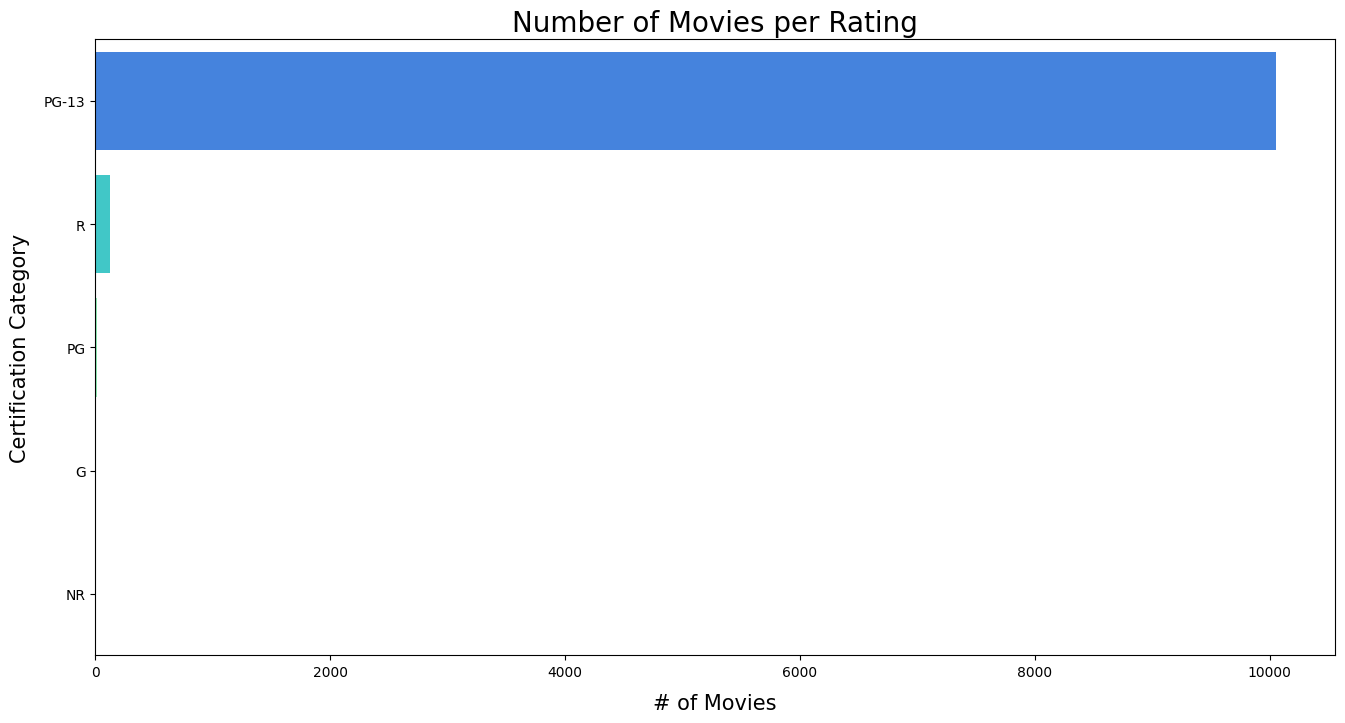

In [40]:
# Let's plot our horizontal bar graph.
## Code inspired in https://machinelearningknowledge.ai/seaborn-countplot-tutorial-for-beginners/
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.countplot(data=movies_2000_and_2001, y='certifcation', palette='rainbow',
                   order=movies_2000_and_2001['certifcation'].value_counts(ascending=False).index)
ax.set_ylabel('Certification Category', fontsize=15,labelpad=10)
ax.set_xlabel('# of Movies', fontsize=15,labelpad=10)
ax.set_title('Number of Movies per Rating', fontsize=20)
plt.savefig('number_movies_rating.png', pad_inches=1, bbox_inches='tight');

- What is the average revenue per certification category?

In [41]:
movies_2000_and_2001.groupby('certifcation')['revenue'].mean().sort_values(ascending=False)

certifcation
PG-13    1.510818e+09
G        7.364602e+07
PG       5.871221e+07
R        2.308620e+07
NR       9.530881e+06
Name: revenue, dtype: float64

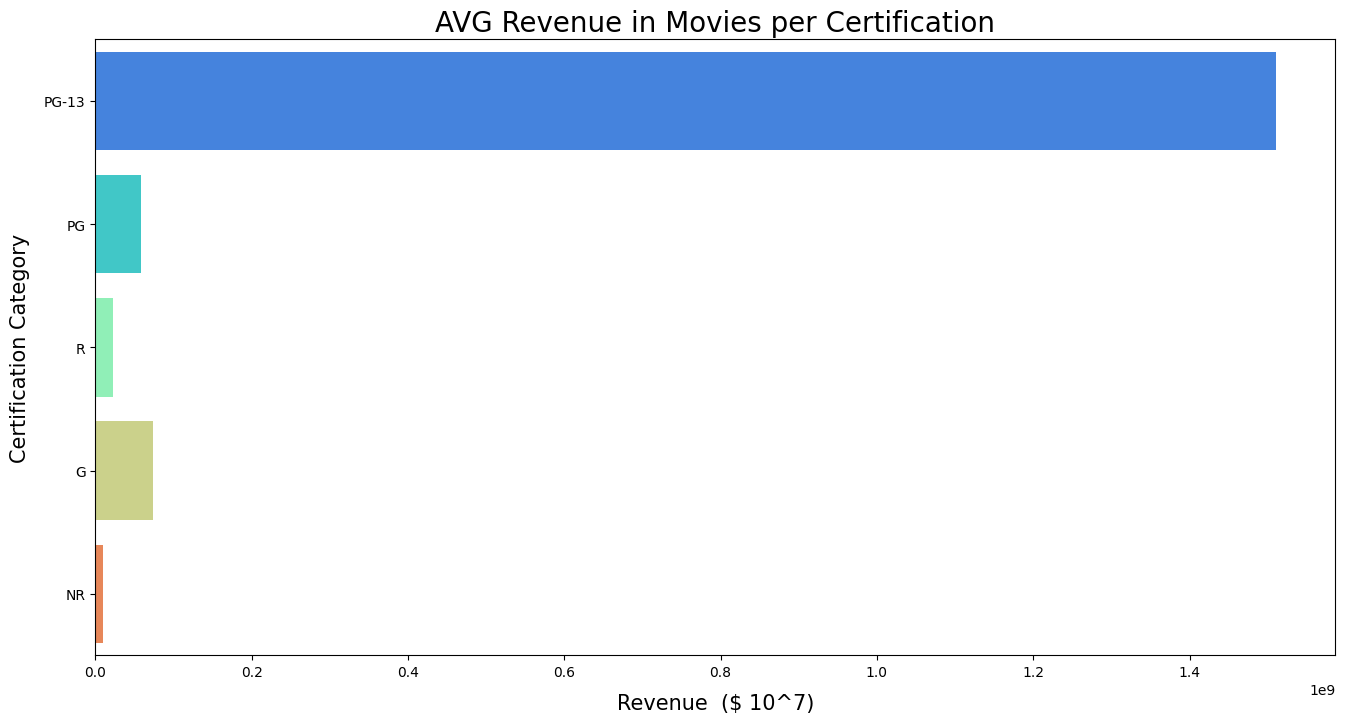

In [42]:
# Plot the results.
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.barplot(data=movies_2000_and_2001, x='revenue', y='certifcation', palette='rainbow', ci=None)
ax.set_ylabel('Certification Category', fontsize=15,labelpad=10)
ax.set_xlabel('Revenue  ($ 10^7)', fontsize=15,labelpad=10)
ax.set_title('AVG Revenue in Movies per Certification', fontsize=20)
plt.savefig('avg_revenue_certification', pad_inches=1, bbox_inches='tight');

- What is the average budget per certification category?

In [43]:
movies_2000_and_2001.groupby('certifcation')['budget'].mean().sort_values(ascending=False)

certifcation
PG-13    2.190014e+08
PG       3.757368e+07
G        3.316667e+07
R        1.259315e+07
NR       1.230000e+07
Name: budget, dtype: float64

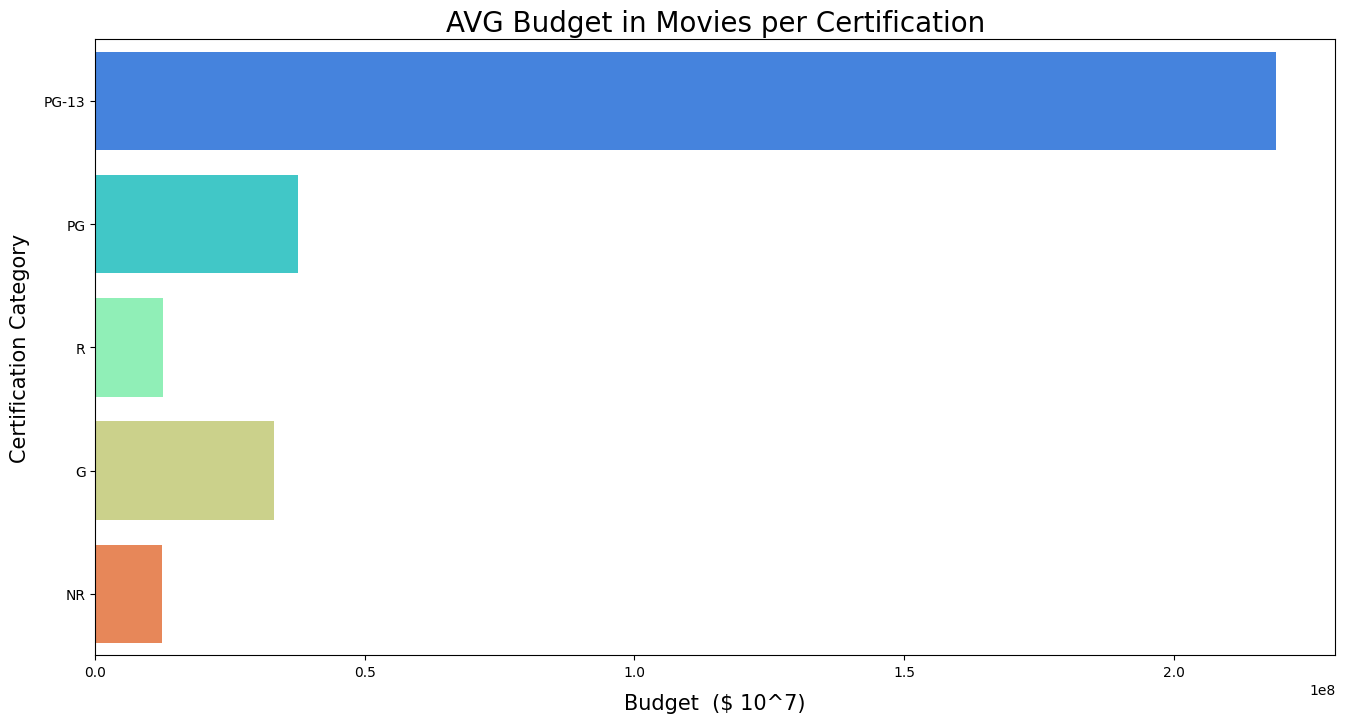

In [44]:
# Plot the results.
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.barplot(data=movies_2000_and_2001, x='budget', y='certifcation', palette='rainbow', ci=None)
ax.set_ylabel('Certification Category', fontsize=15,labelpad=10)
ax.set_xlabel('Budget  ($ 10^7)', fontsize=15,labelpad=10)
ax.set_title('AVG Budget in Movies per Certification', fontsize=20)
plt.savefig('avg_budget_certification', pad_inches=1, bbox_inches='tight');